# RESUMO INFECÇÃO CORONAVIRUS BRASIL

### Autor: Yuri Passuelo

### Data: Março 2020

## Introdução

Esse se trata apenas de um resumo de informações divulgadas por parte da universidade Jonh Hopkins acerca das estatísticas de transmissão do vírus com foco no Brasil, não se trata de um trabalho de cunho profissional e sim apenas de pura forma de divulgar algumas informações, buscamos durante o relatório aplicar diferentes metodologias para a estimação do comportamento de como crescem as infecções no Brasil, ao fim do texto divulgaremos as respectivas fontes relacionadas a infecção.

## Analise Primaria dos Dados

Abaixo seguem os dados atualizados para as datas mais recentes, nesses gráficos estamos colocando a evolução dos casos de COVID registrados no Brasil até a data mais recente de forma acumulada, e no gráfico seguinte o número de casos diários de COVID. Não necessariamente o número de casos deve ser o mesmo com os reportados pelo ministério da saúde, uma vez que a fonte de dados da Jonh Hopkins Univeristy irá considerar dados provenientes das secretarias de saúde dos estados também.

Vemos pelos dois gráficos abaixo a evolução do número de infectados a partir do primeiro caso registrado no Brasil, e no gráfico seguinte o número de novos casos diários, é possível entender que o número máximo de casos diários já teria sido alcançado por volta do dia 23/24 de março, e a partir daí haveria uma estabilização no número de novas infecções.


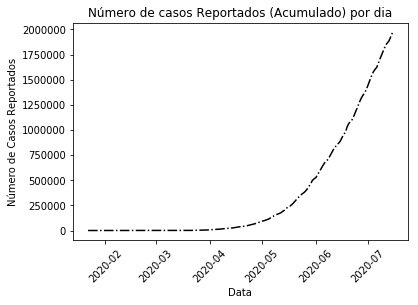

Text(0.5,1,'Número de novos casos Reportados por dia')

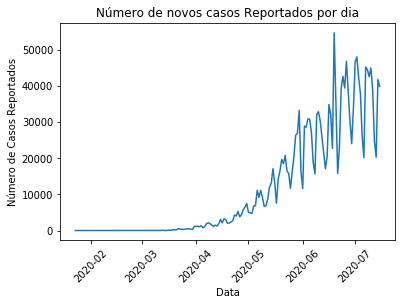

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optim
import datetime as dt
from IPython.display import HTML
import warnings
from sklearn.linear_model import LinearRegression

warnings.simplefilter('ignore')

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

covid_data = pd.read_csv(url,error_bad_lines=False). \
                melt( id_vars = ['Country/Region', 'Province/State', 'Lat', 'Long'],
                      value_name = 'Cases',
                      var_name   = 'Date' ). \
                rename( columns = {'Country/Region':'Country',
                                   'Province/State':'State'})

br_covid = covid_data[ covid_data['Country'] == 'Brazil'].reset_index()

# Número de casos acumulados por dia

plt.plot(pd.Series(np.array(br_covid['Cases']),
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=len(br_covid['Date']))),
                   label='Casos Efetivos',
                   c='black',
                   linestyle='-.')
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de casos Reportados (Acumulado) por dia",loc='center')
plt.show()

# Novos casos por dia

new_cases_br = pd.DataFrame( {'Date': br_covid.loc[1:len(br_covid),'Date'] ,
                              'novos_casos':[ br_covid.loc[i,'Cases'] - br_covid.loc[i-1,'Cases'] for i in range(1,len(br_covid))]} )

# Gráfico da evolução dos novos casos diarios

plt.plot( pd.Series( np.array( pd.to_datetime( new_cases_br['Date'] ) ) ),
          np.array( new_cases_br['novos_casos'] ) )
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de novos casos Reportados por dia",loc='center')

#HTML('''<script>
#code_show=true; 
#function code_toggle() {
# if (code_show){
# $('div.input').hide();
# } else {
# $('div.input').show();
# }
# code_show = !code_show
#} 
#$( document ).ready(code_toggle);
#</script>
#The raw code for this IPython notebook is by default hidden for easier reading.
#To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')




Se pegarmos o número de casos que o Brasil teve nos 16 dias (aproximadamente 2 semanas) após a confirmação do centésimo caso, e compararmos com outros epicentros da doença, como os Estados unidos, a Itália, a Espanha e a Coreia do Sul então teremos uma noção de como anda a aceleração de casos no País.

In [27]:
sk_covid.groupby(['State']).count()

,Country,Lat,Long,Date,Cases
State,,,,,


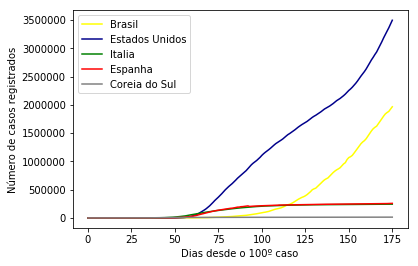

In [29]:

def base_pais(nome_pais):
    
    return covid_data[ covid_data['Country'] == nome_pais]

us_covid, it_covid, sp_covid, sk_covid = base_pais("US"), base_pais("Italy"), base_pais("Spain"), base_pais("Korea, South")

    
plt.plot(np.array(br_covid['Cases']),
        c='yellow',
        label='Brasil')
plt.plot(np.array(us_covid['Cases']),
        c='darkblue',
        label='Estados Unidos')
plt.plot(np.array(it_covid['Cases']),
        c='green',
        label='Italia')
plt.plot(np.array(sp_covid['Cases']),
        c='red',
        label='Espanha')
plt.plot(np.array(sk_covid['Cases']),
        c='grey',
        label='Coreia do Sul')
plt.legend()
plt.xlabel('Dias desde o 100º caso')
plt.ylabel('Número de casos registrados')
plt.show()

O que vemos é que todos os países sofreram um amento considerável de casos a partir da notificação do 100º, com base nas informações disponíveis divulgadas nos principais veículos de comunicação, essa aceleração que deixou todos os outros países com mais de 5000 casos se deve ao fato do início da transmissão interna do vírus, que acaba tomando maior velocidade.

O fato de o Brasil ter apresentado menos casos do que essa amostra de países pode nos mostrar uma série de hipóteses, como:

1. O fato de o Brasil ser um país mais isolado das redes de turismo e comercio global afeta consideravelmente o fluxo de pessoas estrangeiras que passam no país e, portanto, reduzindo o risco de uma expansão no número de infecções.
2. A tomada de medidas precoces contra a expansão da contaminação do vírus pode ter surtido efeito de forma antecipada ao controlar o número de infecções.
3. A falta de disponibilidade de testes para contabilizar de forma mais assertiva o número de casos pode estar gerando uma subestimação do número de casos registrados no País.
4. O Simples fato de estarmos lidando com uma amostra de países que não representaria ao certo as mesmas características e condições do Brasil.

A partir apenas de informações que mostram a evolução dos casos de COVID no pais não poderíamos tirar muitas conclusões, para isso analises mais apuradas e robustas devem se utilizar de mais fontes de informação, e que sejam mais ricas em detalhes, como os micro dados do DataSUS que podem nos mostrar os registro de internação no período, o que poderia nos indicar por exemplo, de uma aumento no número de internações sem diagnostico.


## Modelos Para analise do comportamento de infeção

Como forma de ter uma noção de como andam a evolução dos casos podemos aplicar algumas técnicas que nos permitem tentar modelar o comportamento da evolução da infecção, dentre as técnicas que utilizaremos estão:
1. Regressão Exponencial: Basicamente a estimação de uma regressão linear normal, estimada por mínimos quadrados ordinários, porém com o parâmetro y no formato de logaritmo.
2. Modelo de Crescimento Logístico (LGM): diferente da regressão exponencial não possui estimação por mínimos quadrados, porém é muito mais adequado na modelagem de crescimento de populações

### Modelo de Regressão Exponencial

Como já dito o modelo de regressão exponencial utilizaria basicamente o mesmo conceito de uma regressão linear comum, porém com parâmetro y em log, a transformação que leva a essa estimação se baseia nas seguintes transformações:

\begin{align}
y = \alpha e^\beta t
\end{align}

Aonde y é o número de casos de corona confirmados acumulados, alpha e beta são parâmetros a serem estimados e t é a variável endógena do tempo.

Aplicando o logaritmo neperiano dos dois lados teremos:

\begin{align}
ln(y) = ln(\alpha e^{\beta t})
\end{align}

\begin{align}
ln(y) = ln(\alpha) + ln(e^{\beta t})
\end{align}

\begin{align}
ln(y) = ln(\alpha) + \beta t
\end{align}

Nessa forma funcional podemos estimar uma regressão linear para o logaritmo do número de casos estimados em função do tempo, dada a estimação do modelo e o cálculo do log do número estimado de casos de COVID podemos estimar o número real apenas aplicando:

\begin{align}
\dot{y} = e^{ln(\alpha) + \beta t}
\end{align}

Nos gráficos abaixo teremos a comparação do número de casos confirmados até hoje, e o número de casos confirmados estimado pelo modelo de regressão exponencial, depois mostramos o "fit" do modelo aonde temos um "scatterplot" que coloca no eixo das ordenadas o logaritmo do número de casos estimados, e no eixo das abcissas o número de dias desde o primeiro caso confirmado.

É possível notar que de uma certa forma existe um bom fit no modelo, mostrando que de forma inicial, nas primeiras semanas de contagio o número de casos cresce de forma exponencial mas logo depois começa a ter uma desaceleração, mostrando assim que os casos começam a ter outra função de crescimento, esse descolamento do número de casos estimados pelo modelo e de casos efetivos pode ser visualizando nos dois gráficos.
1. No primeiro gráfico temos que há uma desaceleração total dos casos registrados, enquanto o modelo exponencial estima altas taxas de crescimento, os casos efetivos parecem ficar bem abaixo do estimado pelo modelo.
2. No fit do modelo vemos que em dias mais recentes os pontos no gráfico ficam abaixo da linha estimada pela regressão, indicando desaceleração do número dos casos comparado ao modelo.

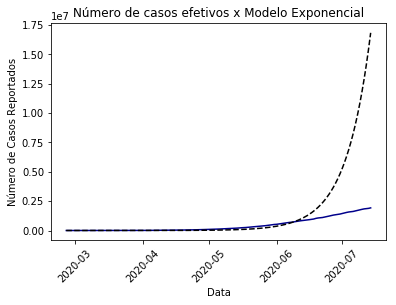

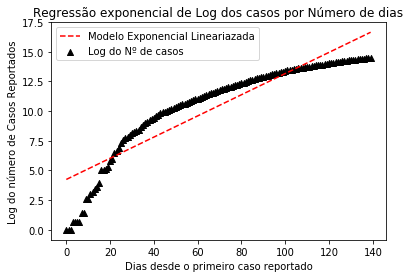

{'tags': ['hide_input']}

In [3]:

# Primeira tentativa de modelo é a de se fazer uma regressão linear simples com parametro de casos por dia convertido para 
# o logaritmo neperiano do númeri dos casos, isso nos permite adotar a forma funcional de y = a*e^b*x, ou seja, estamos adotando
# a premissa que a epidemia segue uma tendência exponencial. Aplicando o logaritmo neperianos nos dois lados da equação teremos:
# ln(y) = ln(a) + b*x

#cria array de variaveis (Dias desde o primeiro caso)


model_1 = LinearRegression(fit_intercept=True).fit(br_covid['Dys_1st_case'].values.reshape(-1, 1),
                                                     br_covid['Ln_Cases'].values.reshape(-1, 1))


predict_ln_cases = model_1.predict(br_covid['Dys_1st_case'].values.reshape(-1, 1))

br_covid['Predicted_Ln_Cases'] = predict_ln_cases
br_covid['Predicted_Cases'] = np.exp(predict_ln_cases)

#Casos efetivos vs Modelo Exponencial


plt.plot(pd.Series(np.array(br_covid['Cases']),
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=len(br_covid['Date']))),
                   label='Casos Efetivos',
                   c='darkblue')
plt.plot(pd.Series(np.array(br_covid['Predicted_Cases']),
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=len(br_covid['Date']))),
                   label='Modelo Exponencial',
                   linestyle='--',
                   c='black')
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de casos efetivos x Modelo Exponencial",loc='center')
plt.show()

# Plot da regressão Exponencial

plt.scatter(x=np.array(br_covid['Dys_1st_case']), 
            y= np.array(br_covid['Ln_Cases']),
            c='black',
            marker='^',
           label='Log do Nº de casos')    
plt.plot(np.array(br_covid['Dys_1st_case']),
         np.array(br_covid['Predicted_Ln_Cases']),
         c= "red", 
         linestyle='--',
         label='Modelo Exponencial Lineariazada')
plt.legend()
plt.ylabel('Log do número de Casos Reportados')
plt.xlabel('Dias desde o primeiro caso reportado')
plt.title("Regressão exponencial de Log dos casos por Número de dias",loc='center')
plt.show()

{
    "tags": [
        "hide_input",
    ]
}
           

### Modelo de Crescimento Logistico (LGM)

Diferente da regressão exponencial o modelo de crescimento logístico não é um modelo que consegue sofrer alterações na sua forma funcional para ser estimado por meio de mínimos quadrados ordinários e portanto lida com outras técnicas de otimização, esse modelo se mostra mais apropriado para estimação do crescimento de populações, uma vez que tem um formato signoidal (formato de S) e portanto apresenta um ponto em que a curva se estabiliza, mostrando limites para o crescimento dessa população, diferentemente de uma regressão exponencial. O modelo de crescimento logístico pode ser representado pela seguinte formula.

\begin{align}
y = \frac{\gamma}{\alpha + e^{\beta t}}
\end{align}

Aonde gama é o valor máximo de infecções, e beta é a taxa de crescimento "logístico" da curva que determina a assinatura do s.

Nos gráficos abaixo podemos comparar a evolução dos casos registrados de forma efetiva, e o estimado pelo modelo logístico, e também a previsão do número máximo de casos que o modelo logístico estima para 90 dias a partir do primeiro caso registrado no Brasil, temos que as curvas ficam de forma próxima, porém com o valores estimados pelo modelo logístico em um grau abaixo do efetivo.

Analisando o comportamento das estimativas temos que até dado momento, tivemos a estimativa do parâmetro Gama para um número em torno dos 5000 casos, número bem baixo se comparado a evolução em outros países, é lógico que não se trata de uma estimativa totalmente apurada, outros parâmetros poderiam ser adicionados para enriquecer a estimativa, mas podemos ter uma noção da diferença entre as estimativas por meio da regressão exponencial e do modelo de crescimento logístico.


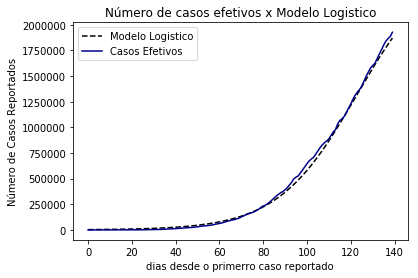

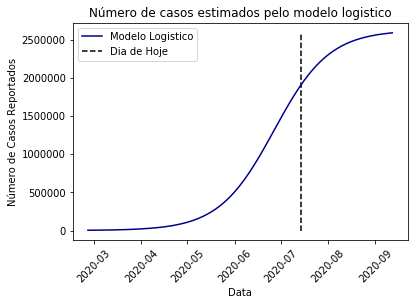

{'tags': ['hide_input']}

In [4]:

### Aplicando um modelo de crescimento logistico ###

def logistic_func(t,a,b,c):
    
    return c/(1+a*np.exp(-b*t))

intervalos = (0, [100000.,3.,200000000])
par = np.random.exponential(size=3)

### Usando outros modelos para estimação dos casos ###

(a,b,c),cov = optim.curve_fit(logistic_func,
                              np.array(br_covid['Dys_1st_case'])+1,
                              np.array(br_covid['Cases']),
                              bounds=intervalos,
                              p0=par)

def logistic_func(t):
    
    return c/(1+a*np.exp(-b*t))

# Plot Casos efetivos x Modelo Logistico

predict_logistic = [ logistic_func(t) for t in np.array(br_covid['Dys_1st_case'])]

plt.plot(np.array(br_covid['Dys_1st_case']),predict_logistic,linestyle='--',c='black',label='Modelo Logistico')
plt.plot(np.array(br_covid['Dys_1st_case']),np.array(br_covid['Cases']),c='darkblue',label='Casos Efetivos')
plt.legend()
plt.ylabel('Número de Casos Reportados')
plt.xlabel('dias desde o primerro caso reportado')
plt.title("Número de casos efetivos x Modelo Logistico",loc='center')
plt.show()

# Simulando o comportamento da curva durante o periodo de 200 dias após a infeção #

simul_logistic = [logistic_func(t) for t in range(1,201)]


plt.plot(pd.Series(simul_logistic, 
                   index=pd.date_range(br_covid['Date'].iloc[0],periods=200)),
         c='darkblue',
         label='Modelo Logistico',)
plt.vlines(max(br_covid.index),ymin=1,ymax=max(simul_logistic),linestyles='--',label='Dia de Hoje')
plt.legend()
plt.ylabel('Número de Casos Reportados')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.title("Número de casos estimados pelo modelo logistico",loc='center')
plt.show()

{
    "tags": [
        "hide_input",
    ]
}



## Conclusão

Nesse relatório simples buscamos apenas mostrar informações disponíveis de forma pública e aplicar algumas técnicas de modelagem de forma bem breve e sem adentrar nos detalhes e muito menos nas estatísticas de inferência/performance, buscando apenas dar uma visão diferente.

Fonte dos dados: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

Link GitHub: https://github.com/yuripassuelo/Python